# Seaborn

Seabornはmatplotlibをもとにした高レベルインターフェースを持ったデータ可視化ライブラリであり、matplotlibと比較し、少ないコードできれいな図を作れたり、回帰直線が入った散布図など統計的なグラフを作成することができる。

## グラフの種類

- 散布図
- バブルチャート
- 棒グラフ
- 積み上げ棒グラフ
- 折れ線グラフ
- 面グラフ
- ツリーマップ
- 100%積み上げグラフ
- 円グラフ
- ヒストグラム
- 箱ひげ図
- バイオリンプロット
- ヒートマップ

## グラフについて

![matplotlib_object](../images/matplotlib_object/1716796224910.png)

SeabornはMatplotlibの`Axes`部分を作成するライブラリになる。そのほかの設定についてはMatplotlibの操作が必要になる。

#### `plt.figure()`による台紙の作成

初めに`plt.figure()`を実行して無地の台紙を作成する。この時、引数により台紙の設定が出来る。

|   引数    |                               説明                               |
| --------- | ---------------------------------------------------------------- |
| figsize   | `Figure`のサイズ。横×縦を`(float, float)`で指定する。            |
| dpi       | 画面に表示する時のdpi。整数                                      |
| facecolor | 図の背景色。Jupyterでは透過色がデフォルト                        |
| linewidth | 図の外枠の太さ。デフォルトは`0`（枠なし）                        |
| edgecolor | 図の外枠の色。                                                   |
| layout    | `constrained`や`tight`等を指定するとオブジェクトが自動調整される |

#### ライブラリのインポート

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

# plt.rcParams["font.family"] = "Meirio"

## 散布図（`seaborn.scatterplot()`）

### 主な引数とその説明

[seaborn.scatterplot()のAPI](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)


| 引数      | 説明            |
| --------- | ------------------------- |
| data      | `Pandas`の`DataFrame`を渡す。渡さない場合は`x`と`y`の引数に配列を渡す。|
| x         | `data_frame`に渡された`DataFrame`の列名、または配列。x軸の値になる。|
| y         | `data_frame`に渡された`DataFrame`の列名、または配列。y軸の値になる。|
| hue       | `data_frame`に渡された`DataFrame`の列名、または配列。値に応じてマーカーの色を変える。カテゴリ値に対して有効。|
| hue_norm  | `タプル`または`リスト`を与える。hueのデータをタプルの範囲で正規化する|
| size      | `data_frame`に渡された`DataFrame`の列名、または配列。値に応じてマーカーのサイズを変える。|
| size_norm | `タプル`または`リスト`を与える。sizeのデータをタプルの範囲で正規化する。 |
| style     | `data_frame`に渡された`DataFrame`の列名、または配列。値に応じてマーカーの形状を変える。カテゴリ値に対して有効。 |
| ax        | `matplotlib.axis.Axes`を与えることができる。|

その他、`matplotlib.axes.Axes.scatter()`の引数も利用できる。

In [2]:
# データの読み込み
scatter_df = pd.read_csv("../data/diabetes.csv")
scatter_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


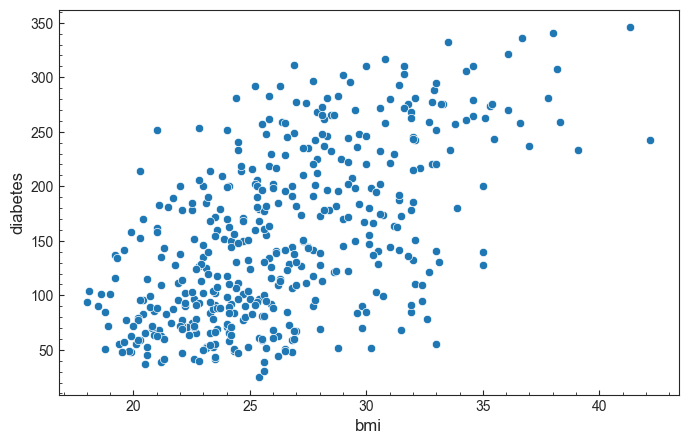

In [3]:
plt.figure(figsize=(8, 5))
sns.set_style("ticks")
sns.scatterplot(
    data=scatter_df,
    x="bmi",
    y="y",
)
plt.xlabel("bmi", fontsize=12)
plt.ylabel("diabetes", fontsize=12)
plt.minorticks_on()
plt.tick_params(direction="in", which="both")
plt.show()

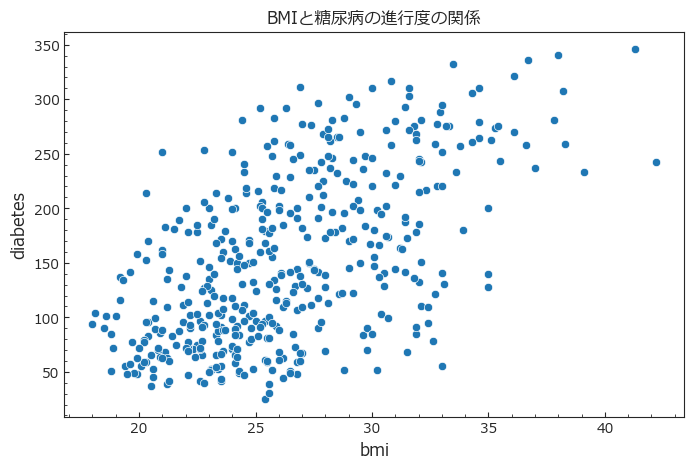

In [29]:
# オブジェクト指向のMaplotlib使用

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
sns.set_style("ticks")
plt.rcParams["font.family"] = "Meiryo"  # 日本語表記
sns.scatterplot(
    data=scatter_df,
    x="bmi",
    y="y",
    ax=ax
)

ax.set_title("BMIと糖尿病の進行度の関係")
ax.set_xlabel("bmi", fontsize=12)
ax.set_ylabel("diabetes", fontsize=12)
ax.minorticks_on()
ax.tick_params(direction="in", which="both")
plt.show()

## 散布図と回帰直線（`seaborn.regplot()`）

Seabornには統計的なグラフを作成するために様々なメソッドが用意されている。`seaborn.regplot()`は、その中でも散布図と散布図の回帰直線を一度に描画することができる。

### 主な引数とその説明

[seaborn.regplot()のAPI](https://seaborn.pydata.org/generated/seaborn.regplot.html)


| 引数      | 説明            |
| --------- | ------------------------- |
| data      | `Pandas`の`DataFrame`を渡す。渡さない場合は`x`と`y`の引数に配列を渡す。|
| x         | `data_frame`に渡された`DataFrame`の列名、または配列。x軸の値になる。|
| y         | `data_frame`に渡された`DataFrame`の列名、または配列。y軸の値になる。|
|ci|`[0, 100]`の`int`型。回帰直線の信頼区間。デフォルトは95(%)。|
|scatter|デフォルトは`True`で散布図を描画するかを決める。|
|logistic|`True`にするとY軸が2値の変数で構成されロジスティック回帰モデルを利用する。|
|robust|`True`にするとロバスト回帰モデルを利用して推定を実施する。|
|logx|`bool`値。`True`にするとX軸を対数表示する。|
| ax        | `matplotlib.axis.Axes`を与えることができる。|

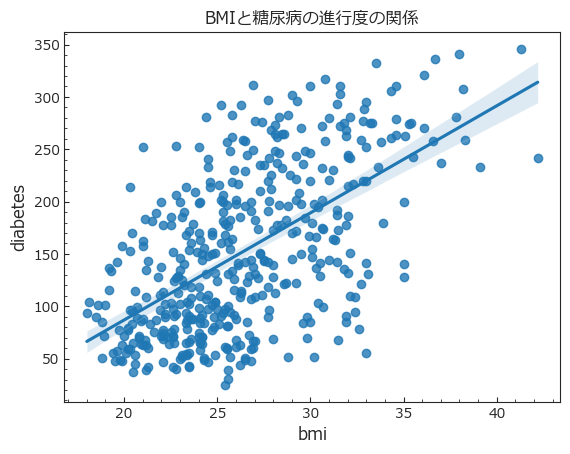

In [30]:
fig = plt.figure()
ax = fig.add_subplot()
sns.set_style("ticks")
plt.rcParams["font.family"] = "Meiryo"
sns.regplot(
    data=scatter_df,
    x="bmi",
    y="y",
    ci=95,  # 95%信頼区間
    fit_reg=True,
    ax=ax,
)

ax.set_title("BMIと糖尿病の進行度の関係")
ax.set_xlabel("bmi", fontsize=12)
ax.set_ylabel("diabetes", fontsize=12)
ax.minorticks_on()
ax.tick_params(direction="in", which="both")
plt.show()

## 散布図と回帰直線②（`seaborn.lmplot()`）

Seabornには統計的なグラフを作成するために様々なメソッドが用意されている。`seaborn.lmgplot()`は、`seaborn.regplot()`と同様に回帰直線を作成することができるが、`hue`、`col`、`row`などの引数により、複数のサブプロットにより描画することができるため、カテゴリ値による条件による

### 主な引数とその説明

[seaborn.lmgplot()のAPI](https://seaborn.pydata.org/generated/seaborn.lmplot.html)


| 引数      | 説明            |
| --------- | ------------------------- |
| data      | `Pandas`の`DataFrame`を渡す。渡さない場合は`x`と`y`の引数に配列を渡す。|
| x         | `data_frame`に渡された`DataFrame`の列名、または配列。x軸の値になる。|
| y         | `data_frame`に渡された`DataFrame`の列名、または配列。y軸の値になる。|
|hue|`data_frame`に渡された`DataFrame`の列名、または配列。値に応じてマーカーの色を変える。カテゴリ値に対して有効。|
|col|`data_frame`に渡された`DataFrame`の列名、または配列。値に応じて列を増やす。カテゴリ値に対して有効。|
|row|`data_frame`に渡された`DataFrame`の列名、または配列。値に応じて行を増やす。カテゴリ値に対して有効。|
| ax        | `matplotlib.axis.Axes`を与えることができる。|

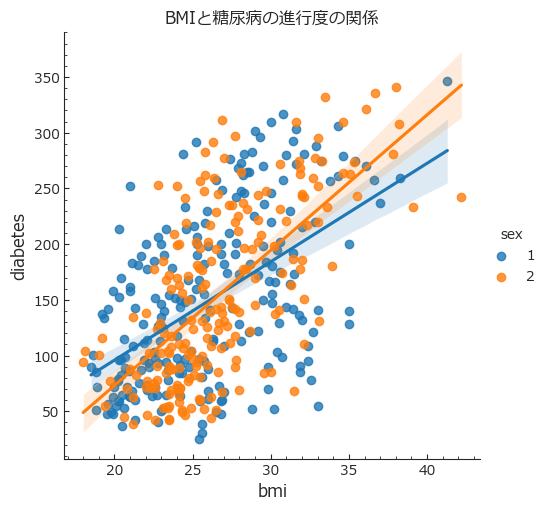

In [32]:
sns.set_style("ticks")
plt.rcParams["font.family"] = "Meiryo"
sns.lmplot(
    data=scatter_df,
    x="bmi",
    y="y",
    hue="sex"
)
plt.title("BMIと糖尿病の進行度の関係")
plt.xlabel("bmi", fontsize=12)
plt.ylabel("diabetes", fontsize=12)
plt.minorticks_on()
plt.tick_params(direction="in", which="both")
plt.show()

## 散布図と回帰直線③（`seaborn.jointplot()`）

Seabornには統計的なグラフを作成するために様々なメソッドが用意されている。`seaborn.jointplot()`は、ヒストグラム付きの散布図を提供する。

### 主な引数とその説明

[seaborn.jointplot()のAPI](https://seaborn.pydata.org/generated/seaborn.jointplot.html)


| 引数      | 説明            |
| --------- | ------------------------- |
| data      | `Pandas`の`DataFrame`を渡す。渡さない場合は`x`と`y`の引数に配列を渡す。|
| x         | `data_frame`に渡された`DataFrame`の列名、または配列。x軸の値になる。|
| y         | `data_frame`に渡された`DataFrame`の列名、または配列。y軸の値になる。|
|hue|`data_frame`に渡された`DataFrame`の列名、または配列。値に応じてマーカーの色を変える。カテゴリ値に対して有効。|
|kind|`scatter`, `kde`, `hist`, `hex`, `reg`, `resid`のいずれかの値。データ部分の描画方法を設定する。|
| ax        | `matplotlib.axis.Axes`を与えることができる。|

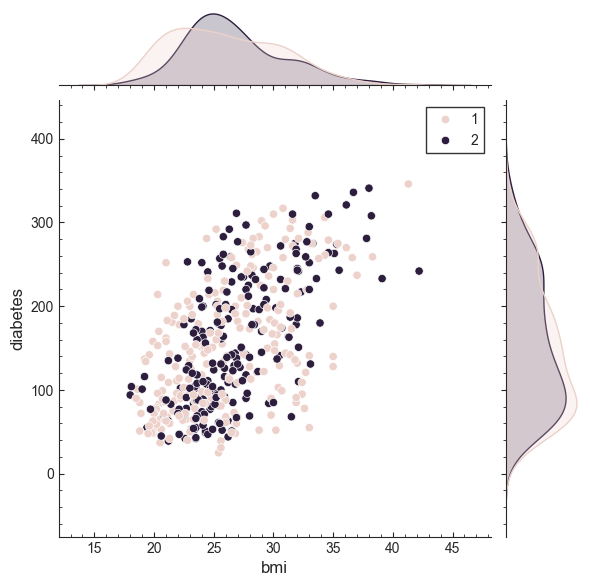

In [7]:
sns.set_style("ticks")

sns.jointplot(
    data=scatter_df,
    x="bmi",
    y="y",
    hue="sex",  # ヒストグラム部分の色分け
    kind="scatter"  # 描画方法は散布図を設定
)
plt.xlabel("bmi", fontsize=12)
plt.ylabel("diabetes", fontsize=12)
plt.minorticks_on()
plt.tick_params(direction="in", which="both")
plt.legend(edgecolor="black", fancybox=False)
plt.show()

## バブルチャート（`seaborn.scatterplot()`）

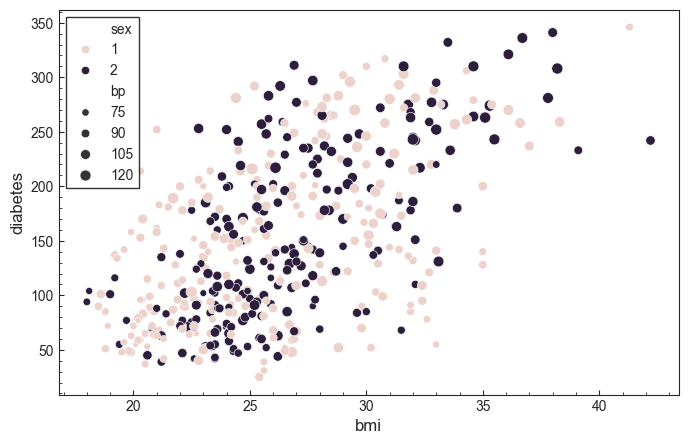

In [33]:
plt.rcParams["font.family"] = "Meiryo"
sns.set_style("ticks")

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
sns.scatterplot(
    data=scatter_df,
    x="bmi",
    y="y",
    hue="sex",
    size="bp",
    ax=ax
)

ax.set_xlabel("bmi", fontsize=12)
ax.set_ylabel("diabetes", fontsize=12)
ax.minorticks_on()
ax.tick_params(direction="in", which="both")
ax.legend(edgecolor="black", fancybox=False)
plt.show()

## 棒グラフ（`seaborn.barplot()`）

### 主な引数とその説明

[seaborn.barplot()のAPI](https://seaborn.pydata.org/generated/seaborn.barplot.html)


| 引数      | 説明            |
| --------- | ------------------------- |
| data      | `Pandas`の`DataFrame`を渡す。渡さない場合は`x`と`y`の引数に配列を渡す。|
| x         | `data_frame`に渡された`DataFrame`の列名、または配列。x軸の値になる。|
| y         | `data_frame`に渡された`DataFrame`の列名、または配列。y軸の値になる。|
| hue       | `data_frame`に渡された`DataFrame`の列名、または配列。値に応じてマーカーの色を変える。カテゴリ値に対して有効。|
|errorbar|`string`、stringの`タプル`。エラーバーメソッドの名前（`ci`、`pi`、`sd`、`se`）とそのパラメータ。設定しないと非表示になる。|
|orient|`v`, `h`, `x`, `y`でバーの向きを設定する。通常は、入力変数の型に基づいて自動で決定される。|
|log_scale|(`bool`, axis)で対数表示する軸を設定する|
| ax        | `matplotlib.axis.Axes`を与えることができる。|

その他、`matplotlib.axes.Axes.scatter()`の引数も利用できる。

In [9]:
bar_df = pd.read_csv(
    "../data/city_temperature.csv",
    sep="\t",  # タブ区切りのデータを取得
    index_col=None,
    parse_dates=["date"],  # 文字列から日付データに変換したい列名
    date_format="%Y%m%d",  # 日付データのフォーマット 例) 20111001 -> 2011-10-01
)

bar_df["month"] = bar_df["date"].dt.month

bar_df

,date,New York,San Francisco,Austin,month
0,2011-10-01,63.4,62.7,72.2,10
1,2011-10-02,58.0,59.9,67.7,10
2,2011-10-03,53.3,59.1,69.4,10
3,2011-10-04,55.7,58.8,68.0,10
4,2011-10-05,64.2,58.7,72.4,10
...,...,...,...,...,...
361,2012-09-26,68.5,53.6,79.6,9
362,2012-09-27,69.2,52.1,76.4,9
363,2012-09-28,68.7,52.6,77.2,9
364,2012-09-29,62.5,53.9,75.2,9


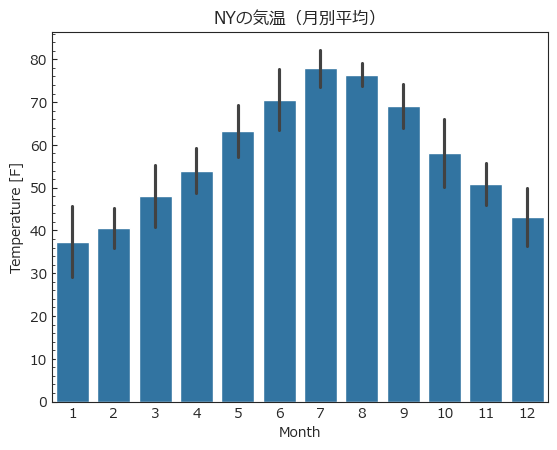

In [10]:
sns.set_style("ticks")
plt.rcParams["font.family"] = "Meiryo"

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(
    data=bar_df,
    x="month",
    y="New York",
    errorbar=("sd", 1),  # 標準偏差の1倍をエラーバーとして利用
    ax=ax
)

# plt.xticks(month)
ax.set_title("NYの気温（月別平均）")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature [F]")
ax.minorticks_on()
ax.tick_params(direction="in", which="both", bottom=False)
plt.show()

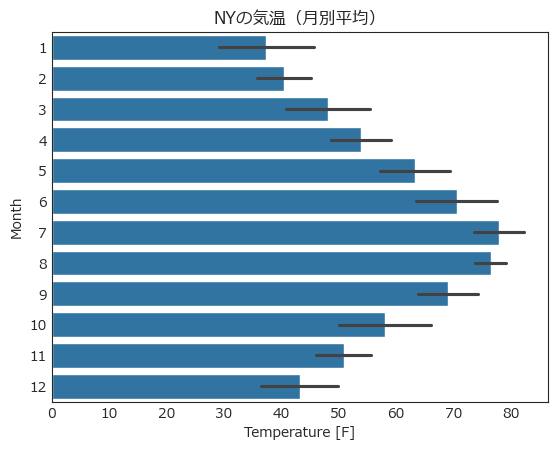

In [11]:
sns.set_style("ticks")
plt.rcParams["font.family"] = "Meiryo"

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(
    data=bar_df,
    x="New York",
    y="month",
    errorbar=("sd", 1),  # 標準偏差の1倍をエラーバーとして利用
    orient="h",
    ax=ax
)

# plt.xticks(month)
ax.set_title("NYの気温（月別平均）")
ax.set_xlabel("Temperature [F]")
ax.set_ylabel("Month")
ax.minorticks_on()
ax.tick_params(direction="in", which="both", bottom=False)
plt.show()

In [12]:
bar_df2 = bar_df.iloc[:, 1:].melt(
    id_vars="month", var_name="city", value_name="temperature"
)
bar_df2

,month,city,temperature
0,10,New York,63.4
1,10,New York,58.0
2,10,New York,53.3
3,10,New York,55.7
4,10,New York,64.2
...,...,...,...
1093,9,Austin,79.6
1094,9,Austin,76.4
1095,9,Austin,77.2
1096,9,Austin,75.2


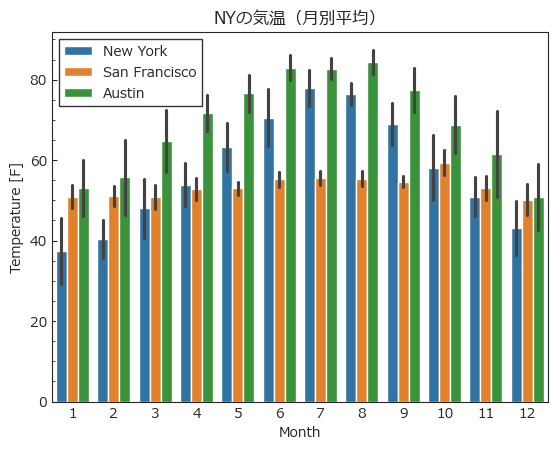

In [34]:
sns.set_style("ticks")
plt.rcParams["font.family"] = "Meiryo"

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(
    data=bar_df2,
    x="month",
    y="temperature",
    hue="city",
    errorbar=("sd", 1),  # 標準偏差の1倍をエラーバーとして利用
    ax=ax
)

# plt.xticks(month)
ax.set_title("NYの気温（月別平均）")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature [F]")
ax.minorticks_on()
ax.tick_params(direction="in", which="both", bottom=False)
ax.legend(edgecolor="black", fancybox=False)
plt.show()

## 積み上げ棒グラフ(`seaborn.histplot()`)

積み上げ棒グラフは`seaborn.barplot()`で作成できないので、binの数をxの数と同じにすることで`seaborn.histplot()`で代用した。

### 主な引数とその説明

[seaborn.histplot()のAPI](https://seaborn.pydata.org/generated/seaborn.histplot.html)


| 引数      | 説明            |
| --------- | ------------------------- |
| data      | `Pandas`の`DataFrame`を渡す。渡さない場合は`x`と`y`の引数に配列を渡す。|
| x         | `data_frame`に渡された`DataFrame`の列名、または配列。x軸の値になる。|
| y         | `data_frame`に渡された`DataFrame`の列名、または配列。y軸の値になる。|
| hue       | `data_frame`に渡された`DataFrame`の列名、または配列。値に応じてマーカーの色を変える。カテゴリ値に対して有効。|
|weights|`data_frame`に渡された`DataFrame`の列名。|
|stat|`count`, `frequency`, `probability`, `percent`, `density`。各binで計算する統計の集計方法を設定する。|
|bins|binの数。|
|binwidth|各binの幅|
|binrange|binの最低値と最大値を設定する|
|cumulative|`True`の場合、binの増加に伴って累積値をカウントする。|
|multiple|`layer`, `dodge`, `stack`, `fill`。weightsで渡された列に従ってどのように表示するかを決める。|
|kde|`True`の場合、カーネル密度の推定を計算しバー上に表示する。|
| ax        | `matplotlib.axis.Axes`を与えることができる。|

その他、`matplotlib.axes.Axes.scatter()`の引数も利用できる。

In [14]:
stacked_bar_df = pd.read_csv("../data/japan_energy.csv")
stacked_bar_df["年度"] = stacked_bar_df["年度"].astype(int)
stacked_bar_df = stacked_bar_df.melt(id_vars="年度", var_name="エネルギー種", value_name="供給量")
stacked_bar_df.head()

,年度,エネルギー種,供給量
0,1965,石油,3.56
1,1966,石油,4.13
2,1967,石油,5.11
3,1968,石油,5.95
4,1969,石油,7.19


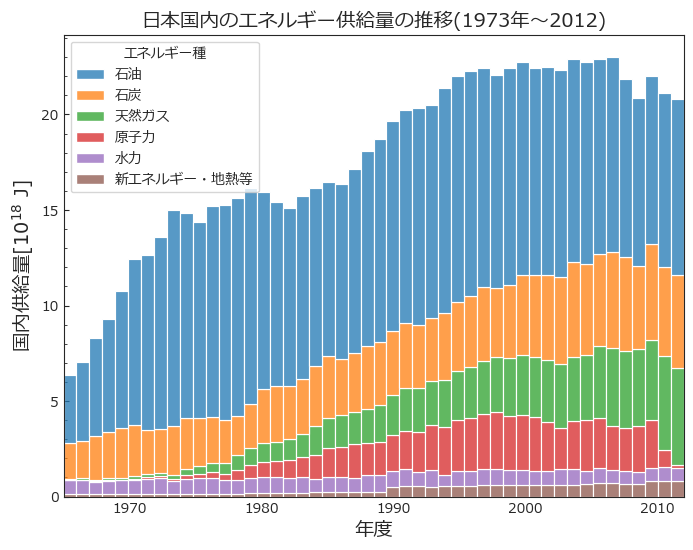

In [38]:
sns.set_style("ticks")
plt.rcParams["font.family"] = "Meiryo"

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

sns.histplot(
    data=stacked_bar_df,
    x="年度",
    hue="エネルギー種",
    weights="供給量",
    multiple="stack",
    bins=len(stacked_bar_df["年度"].unique()),
    ax=ax,
)

ax.set_xlabel("年度", fontsize=14)
ax.set_ylabel("国内供給量[$10^{18}$ J]", fontsize=14)
ax.set_title("日本国内のエネルギー供給量の推移(1973年～2012)", fontsize=14)
ax.set_xlim([1965, 2012])
ax.minorticks_on()
ax.tick_params(direction="in", which="both", bottom=False)

# ax.set_xticks(rotation=90)
plt.show()

## 折れ線グラフ（`sns.lineplot()`）

### 主な引数とその説明

[sns.scatterplot()のAPI](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)


| 引数      | 説明            |
| --------- | ------------------------- |
| data      | `Pandas`の`DataFrame`を渡す。渡さない場合は`x`と`y`の引数に配列を渡す。|
| x         | `data_frame`に渡された`DataFrame`の列名、または配列。x軸の値になる。|
| y         | `data_frame`に渡された`DataFrame`の列名、または配列。y軸の値になる。|
| hue       | `data_frame`に渡された`DataFrame`の列名、または配列。値に応じてマーカーの色を変える。カテゴリ値に対して有効。|
| hue_norm  | `タプル`または`リスト`を与える。hueのデータをタプルの範囲で正規化する|
| size      | `data_frame`に渡された`DataFrame`の列名、または配列。値に応じてマーカーのサイズを変える。|
| size_norm | `タプル`または`リスト`を与える。sizeのデータをタプルの範囲で正規化する。 |
| style     | `data_frame`に渡された`DataFrame`の列名、または配列。値に応じてマーカーの形状を変える。カテゴリ値に対して有効。 |
| ax        | `matplotlib.axis.Axes`を与えることができる。|

その他、`matplotlib.axes.Axes.scatter()`の引数も利用できる。

In [16]:
# プロット用のデータ取得

plot_df = pd.read_csv(
    "../data/city_temperature.csv",
    sep="\t",  # タブ区切りのデータを取得
    index_col=None,
    parse_dates=["date"],  # 文字列から日付データに変換したい列名
    date_format="%Y%m%d",  # 日付データのフォーマット 例) 20111001 -> 2011-10-01
)

plot_df = plot_df.melt("date", var_name="city", value_name="temperature")

# データの確認
plot_df.head()

,date,city,temperature
0,2011-10-01,New York,63.4
1,2011-10-02,New York,58.0
2,2011-10-03,New York,53.3
3,2011-10-04,New York,55.7
4,2011-10-05,New York,64.2


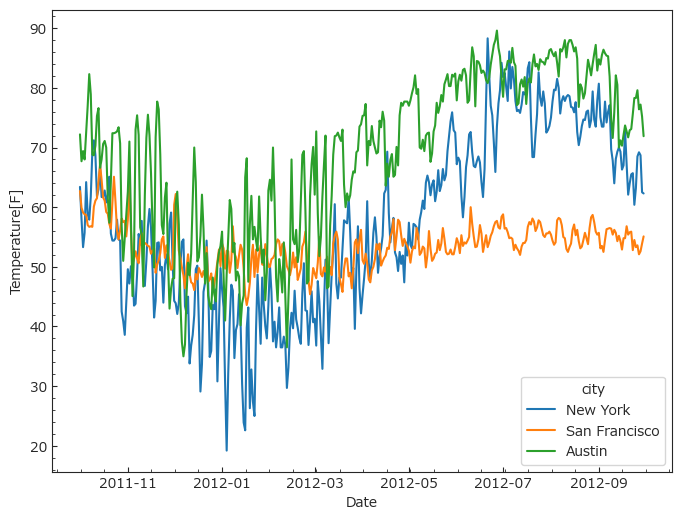

In [17]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

sns.lineplot(
    data=plot_df,
    x="date",
    y="temperature",
    hue="city"
)
ax.set_xlabel("Date")
ax.set_ylabel("Temperature[F]")
ax.minorticks_on()
ax.tick_params(direction="in", which="both")
plt.show()

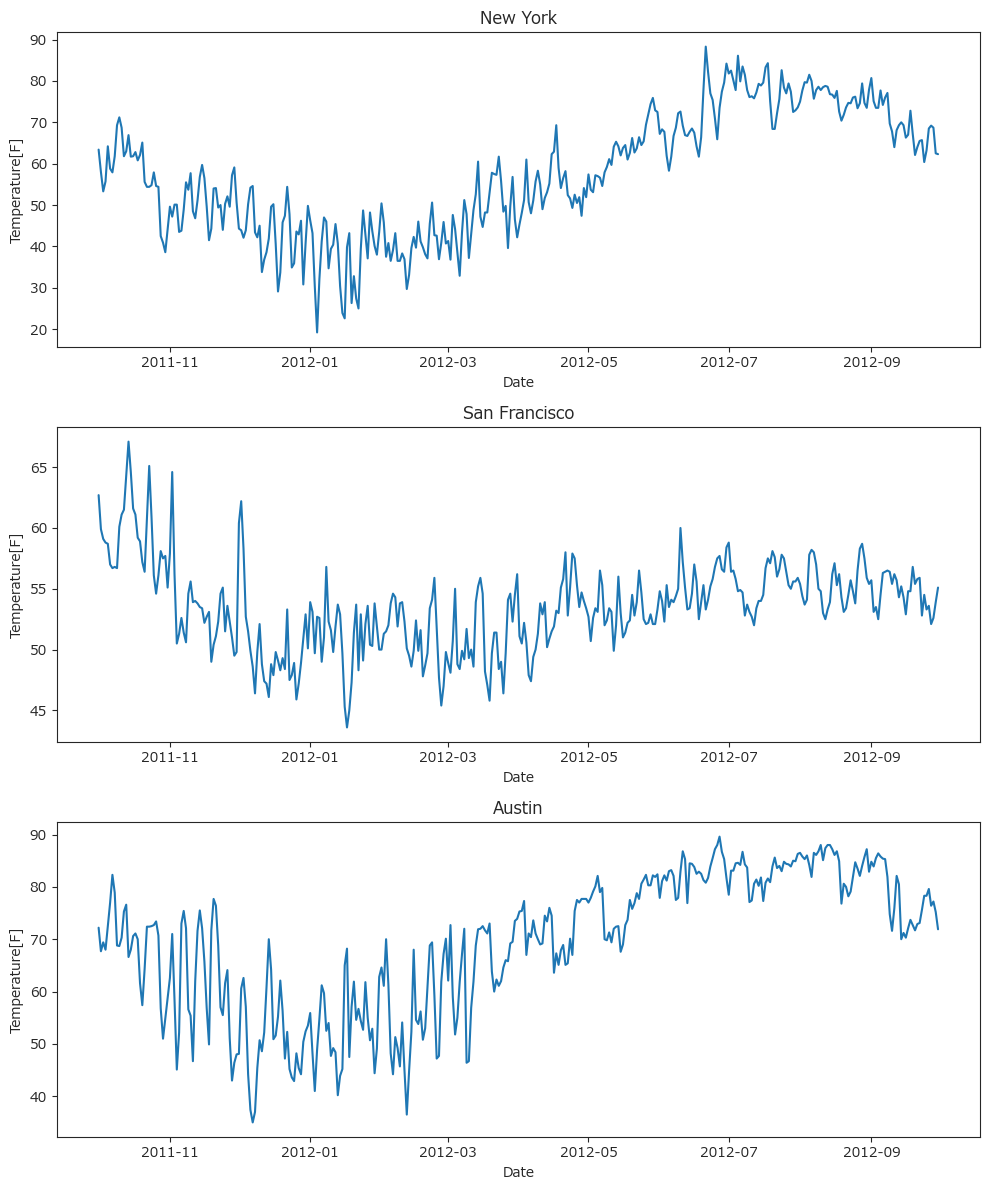

In [18]:
fig = plt.figure(figsize=(10, 12))

for i, city_name in enumerate(plot_df["city"].unique()):
    ax = fig.add_subplot(3, 1, i + 1)
    sns.lineplot(
        data=plot_df[plot_df["city"] == city_name],
        x="date",
        y="temperature",
        ax=ax
    )
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature[F]")
    ax.set_title(city_name)

plt.tight_layout()
plt.show()

## 100%積み重ね棒グラフ(`sns.histplot()`)

In [19]:
stacked_bar_100_df = pd.read_csv("../data/japan_energy.csv")
stacked_bar_100_df["年度"] = stacked_bar_100_df["年度"].astype(int)
stacked_bar_100_df = stacked_bar_100_df.melt(id_vars="年度", var_name="エネルギー種", value_name="供給量")
stacked_bar_100_df.head()

,年度,エネルギー種,供給量
0,1965,石油,3.56
1,1966,石油,4.13
2,1967,石油,5.11
3,1968,石油,5.95
4,1969,石油,7.19


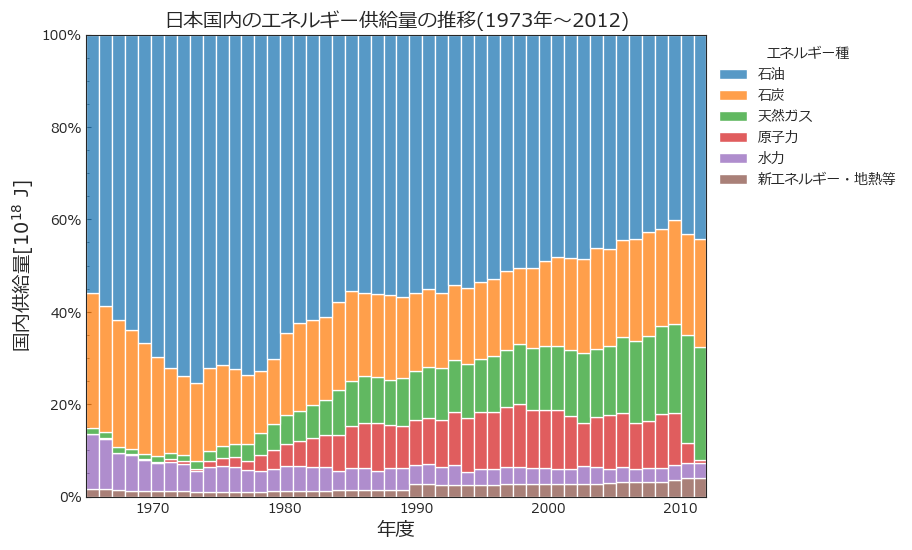

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
sns.histplot(
    data=stacked_bar_100_df,
    x="年度",
    hue="エネルギー種",
    weights="供給量",
    multiple="fill",
    bins=len(stacked_bar_100_df["年度"].unique()),
    ax=ax,
)

ax.set_xlabel("年度", fontsize=14)
ax.set_ylabel("国内供給量[$10^{18}$ J]", fontsize=14)
ax.set_title("日本国内のエネルギー供給量の推移(1973年～2012)", fontsize=14)
ax.set_xlim([1965, 2012])
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])
ax.minorticks_on()
ax.tick_params(direction="in", which="both", bottom=False)
sns.move_legend(obj=ax, loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
# ax.set_xticks(rotation=90)
plt.show()

## ヒストグラム（`sns.histplot()`）


In [21]:
hist_df = pd.read_csv("../data/diamond.csv")
hist_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


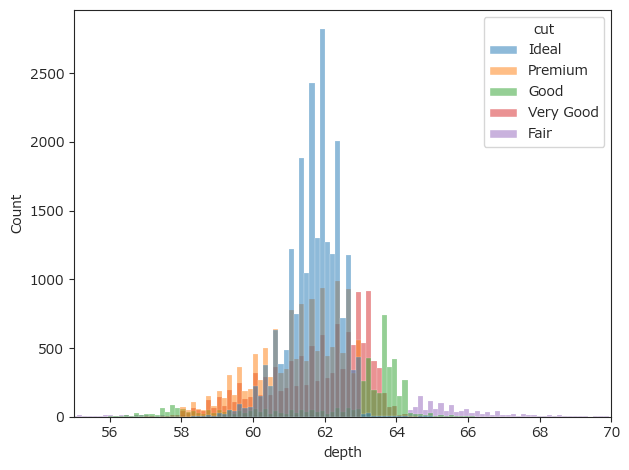

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(
    data=hist_df,
    x="depth",
    hue="cut",
    bins=250,
    ax=ax
)
ax.set_xlim([55, 70])
plt.tight_layout()
plt.show()

## 箱ひげ図（`sns.boxplot()`）

### 主な引数とその説明

[seaborn.boxplot()のAPI](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

| 引数      | 説明            |
| --------- | ------------------------- |
| data      | `Pandas`の`DataFrame`を渡す。渡さない場合は`x`と`y`の引数に配列を渡す。|
| x         | `data_frame`に渡された`DataFrame`の列名、または配列。x軸の値になる。カテゴリ値に対して有効。|
| y         | `data_frame`に渡された`DataFrame`の列名、または配列。y軸の値になる。|
| hue       | `data_frame`に渡された`DataFrame`の列名、または配列。値に応じてボックスの色を変える。カテゴリ値に対して有効。|
|orient|`v`, `h`, `x`, `y`でバーの向きを設定する。通常は、入力変数の型に基づいて自動で決定される。|
| ax        | `matplotlib.axis.Axes`を与えることができる。|

その他、`matplotlib.axes.Axes.scatter()`の引数も利用できる。

In [23]:
box_plot_df = pd.read_csv("../data/iris.csv")
box_plot_df = box_plot_df.melt(id_vars="species", var_name="feature", value_name="size")
box_plot_df.head()

,species,feature,size
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


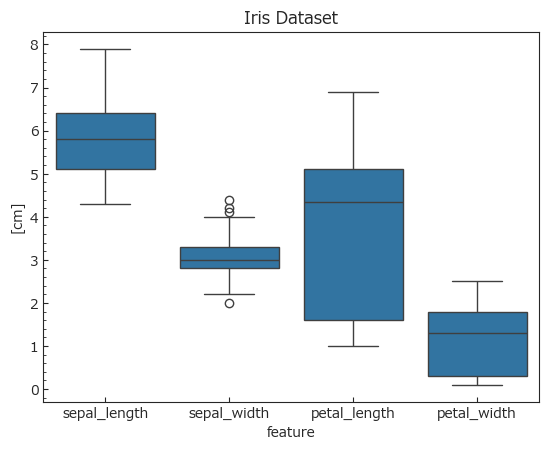

In [24]:
from matplotlib.ticker import AutoMinorLocator

fig = plt.figure()
ax = fig.add_subplot()

sns.boxplot(
    data=box_plot_df,
    x="feature",
    y="size",
    ax=ax
)
ax.set_ylabel("[cm]")
ax.set_title("Iris Dataset", fontsize=12)
ax.tick_params(direction="in", which="both")
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.show()

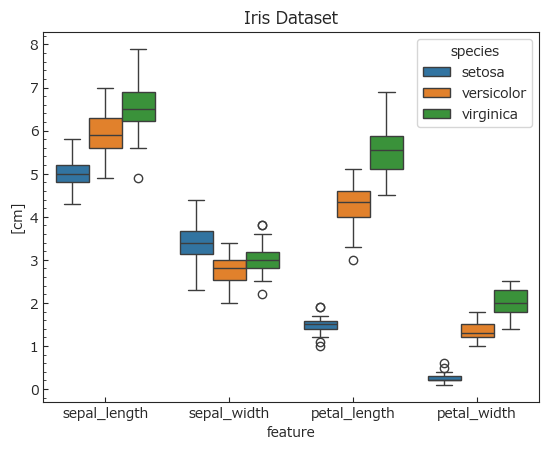

In [25]:
fig = plt.figure()
ax = fig.add_subplot()

sns.boxplot(
    data=box_plot_df,
    x="feature",
    y="size",
    hue="species",
    ax=ax
)
ax.set_ylabel("[cm]")
ax.set_title("Iris Dataset", fontsize=12)
ax.tick_params(direction="in", which="both")
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.show()

## バイオリンプロット（`seaborn.violinplot()`）

### 主な引数とその説明

[seaborn.violinplot()のAPI](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

| 引数      | 説明            |
| --------- | ------------------------- |
| data      | `Pandas`の`DataFrame`を渡す。渡さない場合は`x`と`y`の引数に配列を渡す。|
| x         | `data_frame`に渡された`DataFrame`の列名、または配列。x軸の値になる。カテゴリ値に対して有効。|
| y         | `data_frame`に渡された`DataFrame`の列名、または配列。y軸の値になる。|
| hue       | `data_frame`に渡された`DataFrame`の列名、または配列。値に応じてボックスの色を変える。カテゴリ値に対して有効。|
|orient|`v`, `h`, `x`, `y`でバーの向きを設定する。通常は、入力変数の型に基づいて自動で決定される。|
| ax        | `matplotlib.axis.Axes`を与えることができる。|

その他、`matplotlib.axes.Axes.scatter()`の引数も利用できる。

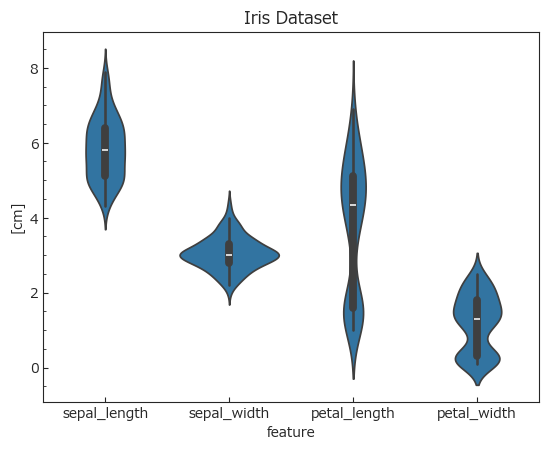

In [26]:
fig = plt.figure()
ax = fig.add_subplot()

sns.violinplot(
    data=box_plot_df,
    x="feature",
    y="size",
    ax=ax
)

# plt.xticklabels(["a", "b", "c", "d"])
ax.set_ylabel("[cm]")
ax.set_title("Iris Dataset", fontsize=12)
ax.tick_params(direction="in", which="both")
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.show()

## ヒートマップ（`seaborn.heatmap()`）

### 主な引数とその説明

[seaborn.heatmap()のAPI](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

| 引数      | 説明            |
| --------- | ------------------------- |
| data      | `Pandas`の`DataFrame`を渡す。渡さない場合は`x`と`y`の引数に配列を渡す。|
|vmin|カラーマップの最低値。|
|vmax|カラーマップの最大値。|
|annot|`True`の倍、各セルにデータ値を書き込む。|
|fmt|annotationのフォーマットを設定する|
|square|`True`の場合、各セルが正方形になる。|
|cmap|`matplotlib`のカラーマップの名前、またはオブジェクト|
| ax        | `matplotlib.axis.Axes`を与えることができる。|

In [27]:
heatmap_df = pd.read_csv("../data/cars_dataset.csv")
heatmap_df = heatmap_df.iloc[:, [1, 2, 4, 6, 7, 8]].corr()  # カテゴリ型を削除
heatmap_df

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.519459,-0.747270,0.244933,-0.144384,-0.028511
price,0.519459,1.000000,-0.426925,0.353244,-0.334174,0.629251
mileage,-0.747270,-0.426925,1.000000,-0.234098,0.179153,0.122965
tax,0.244933,0.353244,-0.234098,1.000000,-0.423287,0.294148
mpg,-0.144384,-0.334174,0.179153,-0.423287,1.000000,-0.282202
engineSize,-0.028511,0.629251,0.122965,0.294148,-0.282202,1.000000


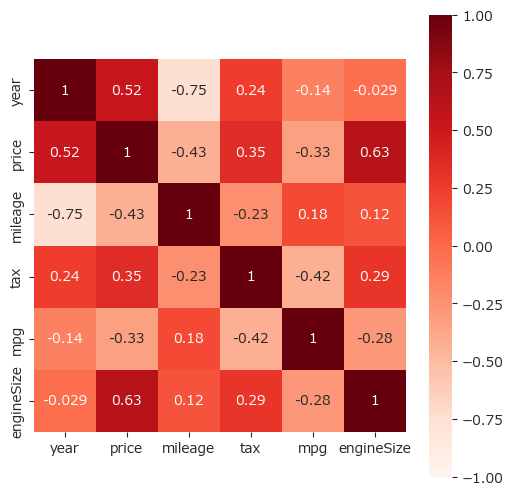

In [28]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()

sns.heatmap(
    data=heatmap_df,
    annot=True,
    square=True,
    cmap="Reds",
    vmin=-1,
    vmax=1
)

plt.show()